=== UPLOAD PLIKU CSV ===
Kliknij 'Choose Files' i wybierz plik 'pd_speech_features.csv'


Saving pd_speech_features.csv to pd_speech_features.csv
Załadowano plik: pd_speech_features.csv

=== WCZYTYWANIE DANYCH ===
Rozmiar danych: (756, 755)

Kolumn: 755, Wierszy: 756

=== STRUKTURA DANYCH ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None

=== STATYSTYKI OPISOWE ===
               id      gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834

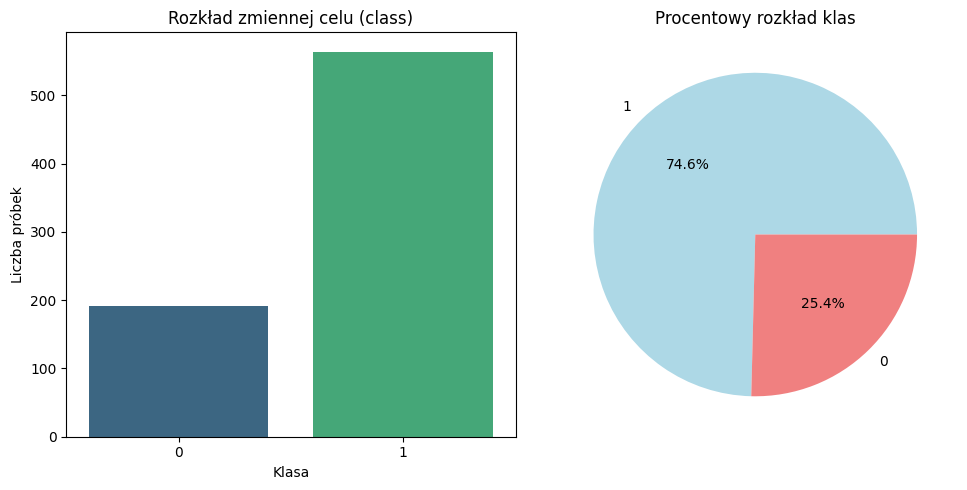


=== PRZYGOTOWANIE DANYCH ===
Shape X: (756, 754), Shape y: (756,)
Zbiór treningowy: (529, 754)
Zbiór testowy: (227, 754)

=== SKALOWANIE CECH ===
Skalowanie zakończone!

=== SELEKCJA NAJWAŻNIEJSZYCH CECH ===
Wybrano 50 najważniejszych cech

=== BUDOWA MODELU REGRESJI LOGISTYCZNEJ ===
Trenowanie modelu podstawowego...
Trenowanie modelu z wybranymi cechami...
Modele wytrenowane!

=== WALIDACJA KRZYŻOWA ===
Walidacja krzyżowa - Model podstawowy: 0.7978 (+/- 0.0706)
Walidacja krzyżowa - Model z selekcją cech: 0.7864 (+/- 0.0502)


=== WYNIKI: Model Podstawowy ===
Dokładność (Accuracy): 0.8282
Precyzja (Precision): 0.8869
Czułość (Recall): 0.8817
F1-Score: 0.8843
AUC-ROC: 0.8517


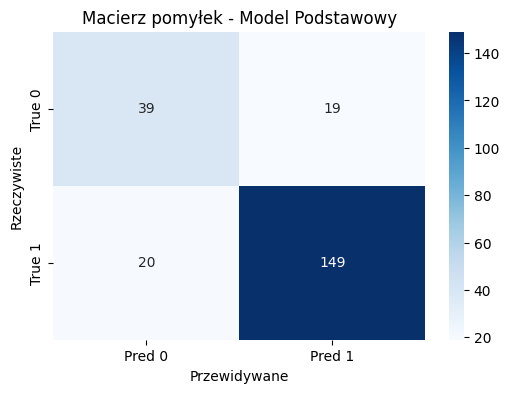


Raport klasyfikacji - Model Podstawowy:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67        58
           1       0.89      0.88      0.88       169

    accuracy                           0.83       227
   macro avg       0.77      0.78      0.78       227
weighted avg       0.83      0.83      0.83       227


=== WYNIKI: Model z Selekcją Cech ===
Dokładność (Accuracy): 0.7797
Precyzja (Precision): 0.8742
Czułość (Recall): 0.8225
F1-Score: 0.8476
AUC-ROC: 0.8405


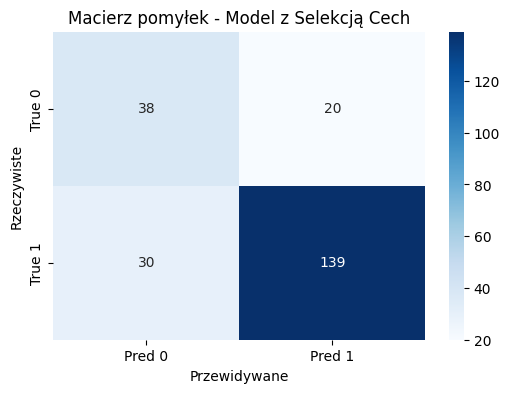


Raport klasyfikacji - Model z Selekcją Cech:
              precision    recall  f1-score   support

           0       0.56      0.66      0.60        58
           1       0.87      0.82      0.85       169

    accuracy                           0.78       227
   macro avg       0.72      0.74      0.73       227
weighted avg       0.79      0.78      0.79       227


=== KRZYWE ROC ===


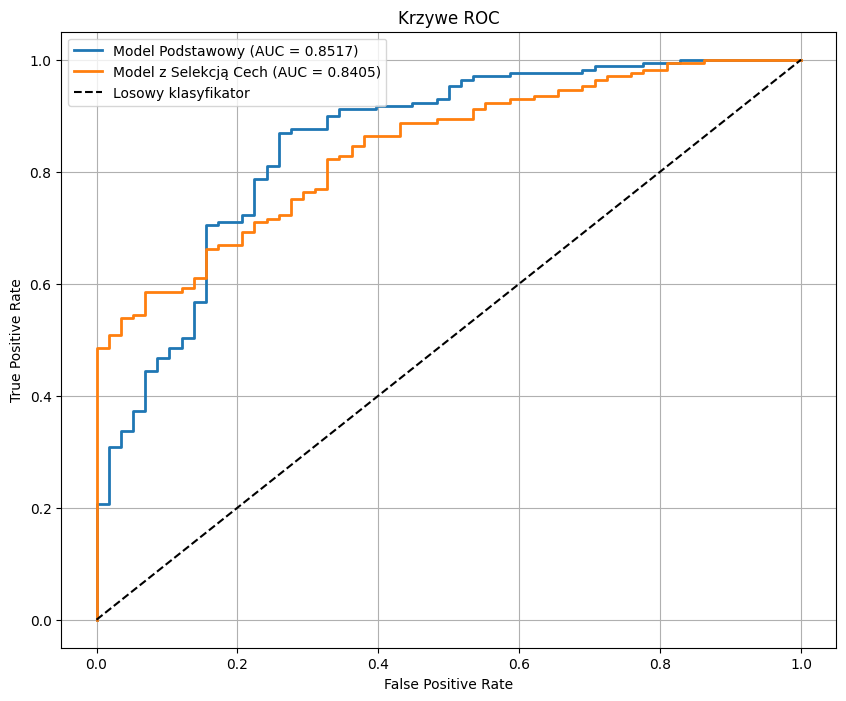


=== ANALIZA WAŻNOŚCI CECH ===
Top 15 najważniejszych cech w modelu podstawowym:
                       feature  importance
33                          b4    0.684848
511    tqwt_medianValue_dec_10    0.663170
404    tqwt_entropy_log_dec_11    0.660373
750  tqwt_kurtosisValue_dec_33    0.654709
704  tqwt_skewnessValue_dec_23    0.642841
426    tqwt_entropy_log_dec_33    0.601057
744  tqwt_kurtosisValue_dec_27    0.593834
64          mean_MFCC_7th_coef    0.593533
136        std_9th_delta_delta    0.571886
519    tqwt_medianValue_dec_18    0.570107
446      tqwt_TKEO_mean_dec_17    0.530300
122              std_9th_delta    0.530025
560      tqwt_meanValue_dec_23    0.512277
553      tqwt_meanValue_dec_16    0.511851
537    tqwt_medianValue_dec_36    0.507390


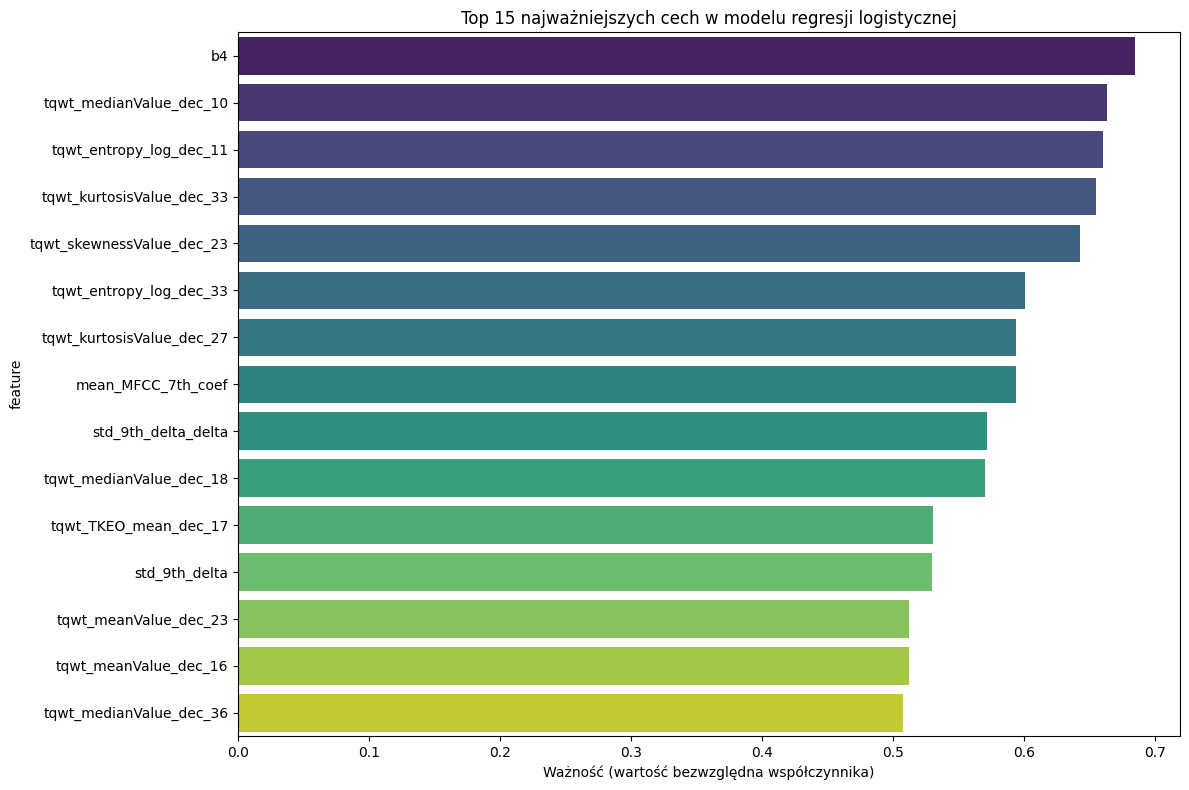


=== DOSTRAJANIE HIPERPARAMETRÓW ===
Dostrajanie hiperparametrów...
Najlepsze parametry: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Najlepszy wynik F1: 0.8478

Dokładność dostrojonego modelu: 0.7797

=== PODSUMOWANIE ===
             Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0       Podstawowy    0.8282     0.8869  0.8817    0.8843   0.8517
1  Z selekcją cech    0.7797     0.8742  0.8225    0.8476   0.8405
2       Dostrojony    0.7797     0.8742  0.8225    0.8476   0.8405


<Figure size 1200x600 with 0 Axes>

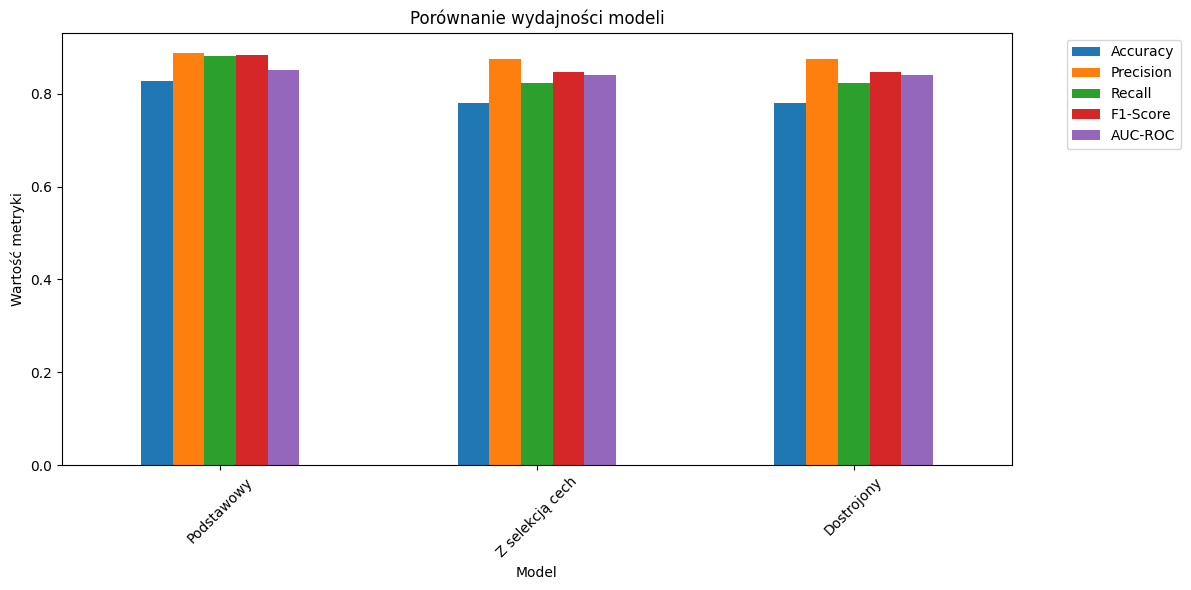


=== MODEL REGRESJI LOGISTYCZNEJ ZBUDOWANY POMYŚLNIE! ===


In [ ]:
# Krok 0: Upload pliku CSV na Colab
from google.colab import files
import io

print("=== UPLOAD PLIKU CSV ===")
print("Kliknij 'Choose Files' i wybierz plik 'pd_speech_features.csv'")
uploaded = files.upload()

# Pobierz nazwę przesłanego pliku
file_name = list(uploaded.keys())[0]
print(f"Załadowano plik: {file_name}")

# Krok 1: Import niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Krok 2: Wczytanie i eksploracja danych
print("\n=== WCZYTYWANIE DANYCH ===")
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"Rozmiar danych: {df.shape}")
print(f"\nKolumn: {df.shape[1]}, Wierszy: {df.shape[0]}")

# Podstawowe informacje o danych
print("\n=== STRUKTURA DANYCH ===")
print(df.info())

print("\n=== STATYSTYKI OPISOWE ===")
print(df.describe())

# Sprawdzenie brakujących wartości
print("\n=== BRAKUJĄCE WARTOŚCI ===")
missing_values = df.isnull().sum()
print(f"Łączna liczba brakujących wartości: {missing_values.sum()}")
if missing_values.sum() > 0:
    print("Kolumn z brakującymi wartościami:")
    print(missing_values[missing_values > 0])

# Analiza zmiennej celu
print("\n=== ANALIZA ZMIENNEJ CELU 'class' ===")
class_distribution = df['class'].value_counts()
print(class_distribution)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Rozkład zmiennej celu (class)')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')

plt.subplot(1, 2, 2)
plt.pie(class_distribution.values, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Procentowy rozkład klas')

plt.tight_layout()
plt.show()

# Krok 3: Przygotowanie danych do modelowania
print("\n=== PRZYGOTOWANIE DANYCH ===")

# Podział na cechy i zmienną docelową
X = df.drop('class', axis=1)
y = df['class']

print(f"Shape X: {X.shape}, Shape y: {y.shape}")

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y,
    shuffle=True
)

print(f"Zbiór treningowy: {X_train.shape}")
print(f"Zbiór testowy: {X_test.shape}")

# Skalowanie cech
print("\n=== SKALOWANIE CECH ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Skalowanie zakończone!")

# Krok 4: Selekcja cech (opcjonalnie)
print("\n=== SELEKCJA NAJWAŻNIEJSZYCH CECH ===")
selector = SelectKBest(score_func=f_classif, k=50)  # Wybieramy 50 najlepszych cech
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print(f"Wybrano {len(selected_features)} najważniejszych cech")

# Krok 5: Budowa i trenowanie modelu regresji logistycznej
print("\n=== BUDOWA MODELU REGRESJI LOGISTYCZNEJ ===")

# Model podstawowy
model_basic = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced'  # Dla niezrównoważonych klas
)

print("Trenowanie modelu podstawowego...")
model_basic.fit(X_train_scaled, y_train)

# Model z wybranymi cechami
model_selected = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced'
)

print("Trenowanie modelu z wybranymi cechami...")
model_selected.fit(X_train_selected, y_train)

print("Modele wytrenowane!")

# Krok 6: Walidacja krzyżowa
print("\n=== WALIDACJA KRZYŻOWA ===")
cv_scores_basic = cross_val_score(model_basic, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_selected = cross_val_score(model_selected, X_train_selected, y_train, cv=5, scoring='accuracy')

print(f"Walidacja krzyżowa - Model podstawowy: {cv_scores_basic.mean():.4f} (+/- {cv_scores_basic.std() * 2:.4f})")
print(f"Walidacja krzyżowa - Model z selekcją cech: {cv_scores_selected.mean():.4f} (+/- {cv_scores_selected.std() * 2:.4f})")

# Krok 7: Predykcje i ewaluacja modeli
def evaluate_model(model, X_test, y_test, model_name):
    """Funkcja do ewaluacji modelu"""
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n=== WYNIKI: {model_name} ===")
    print(f"Dokładność (Accuracy): {accuracy:.4f}")
    print(f"Precyzja (Precision): {precision:.4f}")
    print(f"Czułość (Recall): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

    # Macierz pomyłek
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'])
    plt.title(f'Macierz pomyłek - {model_name}')
    plt.ylabel('Rzeczywiste')
    plt.xlabel('Przewidywane')
    plt.show()

    # Raport klasyfikacji
    print(f"\nRaport klasyfikacji - {model_name}:")
    print(classification_report(y_test, y_pred))

    return y_pred_proba, {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc}

# Ewaluacja obu modeli
print("\n" + "="*50)
y_proba_basic, metrics_basic = evaluate_model(model_basic, X_test_scaled, y_test, "Model Podstawowy")
y_proba_selected, metrics_selected = evaluate_model(model_selected, X_test_selected, y_test, "Model z Selekcją Cech")

# Krok 8: Krzywa ROC
print("\n=== KRZYWE ROC ===")
plt.figure(figsize=(10, 8))

# Model podstawowy
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_proba_basic)
auc_basic = metrics_basic['auc']

# Model z selekcją cech
fpr_selected, tpr_selected, _ = roc_curve(y_test, y_proba_selected)
auc_selected = metrics_selected['auc']

plt.plot(fpr_basic, tpr_basic, label=f'Model Podstawowy (AUC = {auc_basic:.4f})', linewidth=2)
plt.plot(fpr_selected, tpr_selected, label=f'Model z Selekcją Cech (AUC = {auc_selected:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Losowy klasyfikator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC')
plt.legend()
plt.grid(True)
plt.show()

# Krok 9: Analiza ważności cech
print("\n=== ANALIZA WAŻNOŚCI CECH ===")

# Dla modelu podstawowego
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model_basic.coef_[0])
}).sort_values('importance', ascending=False)

print("Top 15 najważniejszych cech w modelu podstawowym:")
print(feature_importance.head(15))

# Wizualizacja ważności cech
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('Top 15 najważniejszych cech w modelu regresji logistycznej')
plt.xlabel('Ważność (wartość bezwzględna współczynnika)')
plt.tight_layout()
plt.show()

# Krok 10: Dostrajanie hiperparametrów (opcjonalne)
print("\n=== DOSTRAJANIE HIPERPARAMETRÓW ===")

# Proste dostrojenie dla modelu z selekcją cech
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

print("Dostrajanie hiperparametrów...")
grid_search.fit(X_train_selected, y_train)

print(f"Najlepsze parametry: {grid_search.best_params_}")
print(f"Najlepszy wynik F1: {grid_search.best_score_:.4f}")

# Finalny model z dostrojonymi parametrami
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)

print(f"\nDokładność dostrojonego modelu: {accuracy_score(y_test, y_pred_best):.4f}")

# Krok 11: Podsumowanie
print("\n" + "="*60)
print("=== PODSUMOWANIE ===")
print("="*60)

models_comparison = pd.DataFrame({
    'Model': ['Podstawowy', 'Z selekcją cech', 'Dostrojony'],
    'Accuracy': [
        metrics_basic['accuracy'],
        metrics_selected['accuracy'],
        accuracy_score(y_test, y_pred_best)
    ],
    'Precision': [
        metrics_basic['precision'],
        metrics_selected['precision'],
        precision_score(y_test, y_pred_best)
    ],
    'Recall': [
        metrics_basic['recall'],
        metrics_selected['recall'],
        recall_score(y_test, y_pred_best)
    ],
    'F1-Score': [
        metrics_basic['f1'],
        metrics_selected['f1'],
        f1_score(y_test, y_pred_best)
    ],
    'AUC-ROC': [
        metrics_basic['auc'],
        metrics_selected['auc'],
        roc_auc_score(y_test, best_model.predict_proba(X_test_selected)[:, 1])
    ]
})

print(models_comparison.round(4))

# Wizualizacja porównania modeli
plt.figure(figsize=(12, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
models_comparison.set_index('Model')[metrics_to_plot].plot(kind='bar', figsize=(12, 6))
plt.title('Porównanie wydajności modeli')
plt.ylabel('Wartość metryki')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n=== MODEL REGRESJI LOGISTYCZNEJ ZBUDOWANY POMYŚLNIE! ===")